### Lets import all the libraries

In [3]:
import pandas as pd
import numpy as np

### Lets get the data

In [4]:
data = pd.read_csv("Fraud_check.csv")
df  = data.copy()
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


Lets get the target variable ready as asked in question

In [5]:
okay_df = df[df["Taxable.Income"]>30000]
risky_df = df[df["Taxable.Income"]<= 30000]

In [6]:
okay_df["Risky"] = 0
risky_df["Risky"] = 1

/tmp/ipykernel_48853/1112080402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  okay_df["Risky"] = 0
/tmp/ipykernel_48853/1112080402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risky_df["Risky"] = 1


In [7]:
df_conc = pd.concat([okay_df,risky_df],axis=0)

In [8]:
df_conc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky
0,NO,Single,68833,50047,10,YES,0
1,YES,Divorced,33700,134075,18,YES,0
2,NO,Married,36925,160205,30,YES,0
3,YES,Single,50190,193264,15,YES,0
4,NO,Married,81002,27533,28,NO,0
...,...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES,1
557,YES,Married,12810,157421,10,NO,1
567,YES,Single,16316,129912,30,NO,1
575,NO,Divorced,10735,95975,13,YES,1


In [9]:
df1 = df_conc.copy() 

### Lets understand the data

In [10]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
Risky               int64
dtype: object

lets separate the continuous and categorical columns

In [11]:
con_cols = [col for col in df1.columns[:-1] if df1[col].dtype != "object"]
cat_cols = [col for col in df1.columns[:-1] if df1[col].dtype == "object"]

In [12]:
cat_cols

['Undergrad', 'Marital.Status', 'Urban']

In [13]:
con_cols


['Taxable.Income', 'City.Population', 'Work.Experience']

### Lets visualize the data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Checking categorical columns

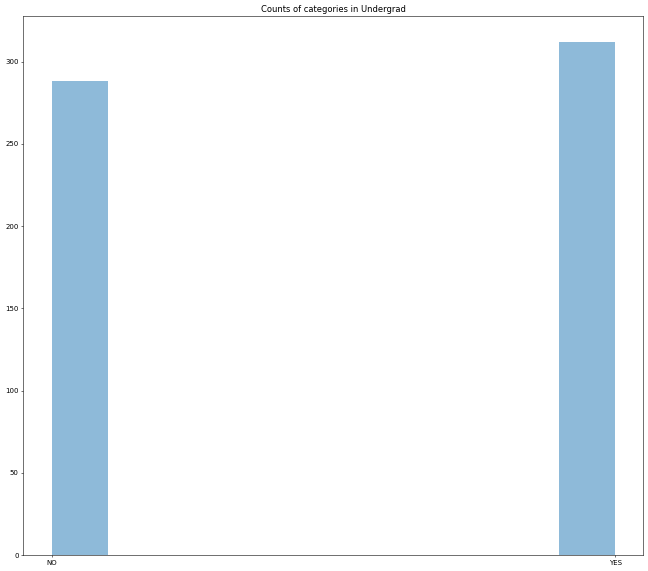

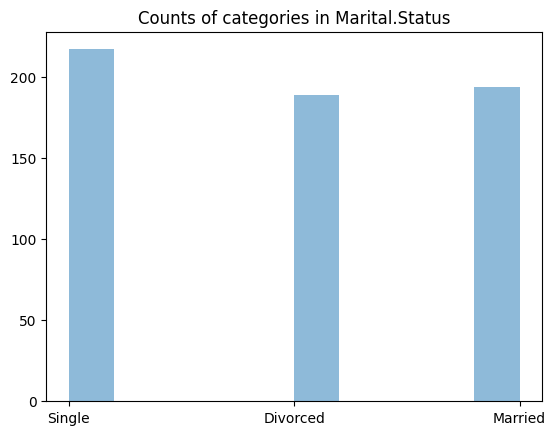

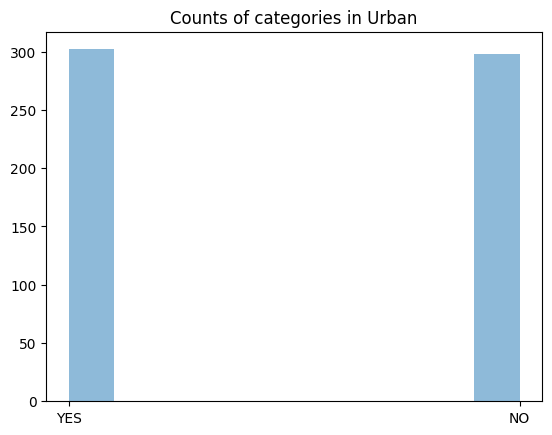

In [56]:
plt.subplots(figsize = (16,14), dpi = 50)
for i , col in enumerate(cat_cols):
    plt.hist(df[col] , alpha = 0.5)
    plt.title(f"Counts of categories in {col}")
    plt.show()

#### Lets check the continous columns now

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x1000 with 0 Axes>

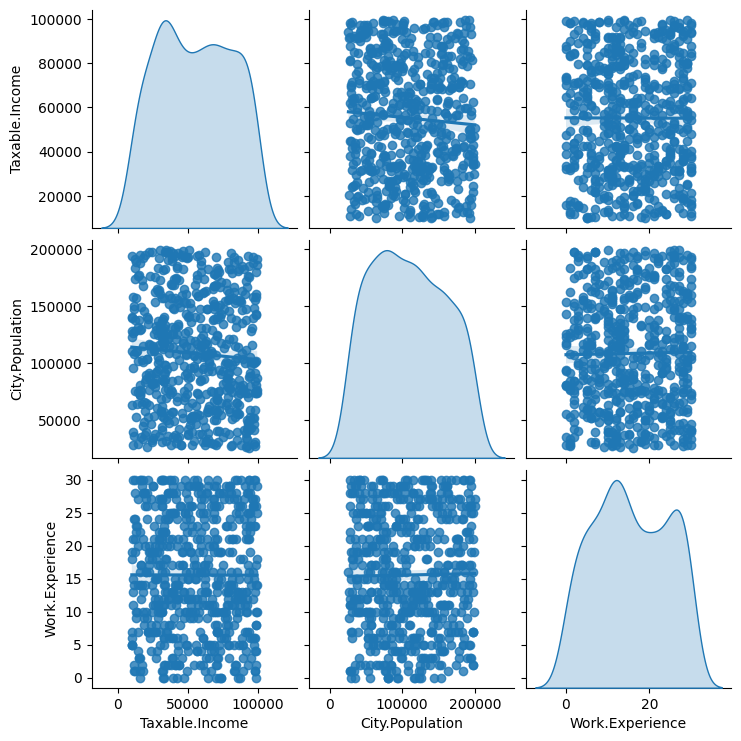

In [60]:
plt.figure(figsize=(14,10))
sns.pairplot(df[con_cols], kind="reg", diag_kind='kde')
plt.show()

As we can see from the above graph the data is spread all out, the taxable income seems to go down as the population decreases which is understood. And on a surprising note as city population increases the Work Experience is also increasing.

### Lets check for outliers

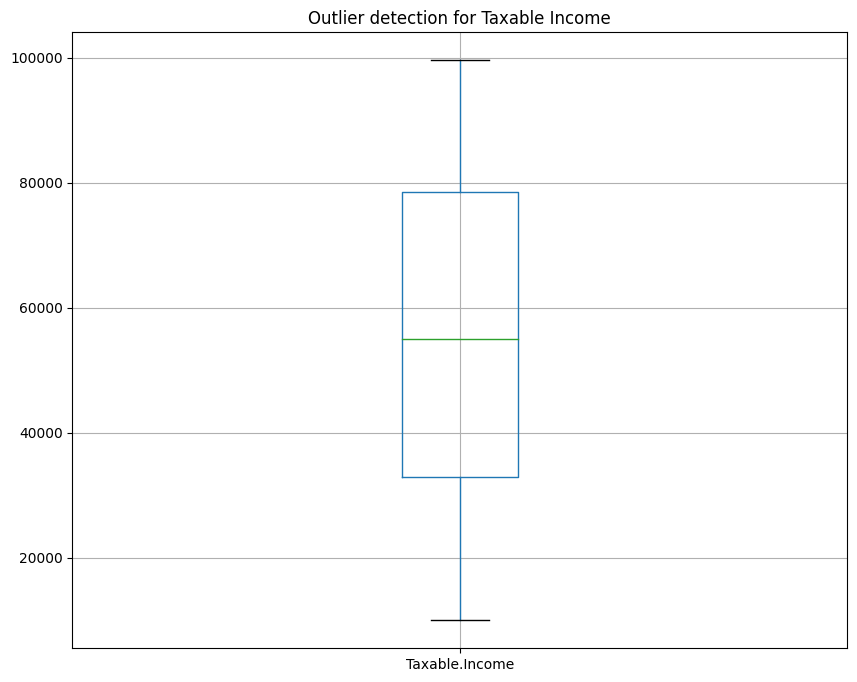

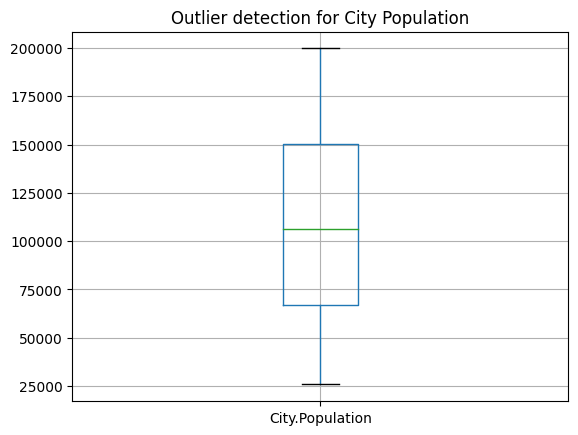

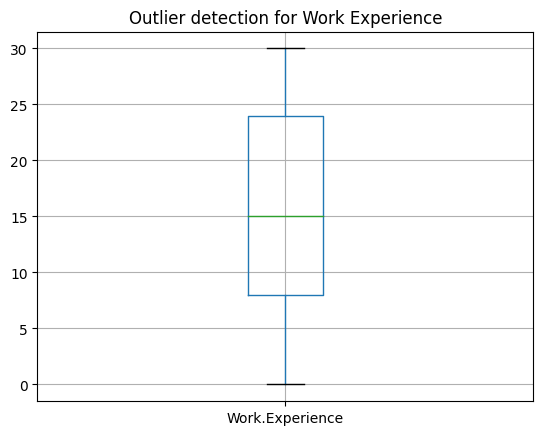

In [66]:
plt.figure(figsize = (10,8))
for i, col in enumerate(con_cols):
    df.boxplot(column=col)
    plt.title(f"Outlier detection for {' '.join(col.split('.'))}")
    plt.show()

There are not outliers as such

### Lets get x and y ready for splitting

In [16]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1:]

In [17]:
y

,Risky
0,0
1,0
2,0
3,0
4,0
...,...
544,1
557,1
567,1
575,1


In [18]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES


### Splitting the dataset

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Lets Scale the Data

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [21]:
x_train

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
192,YES,Married,48313,126556,10,YES
9,YES,Divorced,98152,155482,4,YES
484,YES,Married,59440,114646,28,YES
194,YES,Single,20851,103981,28,NO
250,NO,Married,31591,156973,16,NO
...,...,...,...,...,...,...
90,NO,Divorced,77634,101232,29,NO
139,YES,Divorced,50087,86904,20,NO
355,YES,Single,45525,56488,17,NO
555,NO,Single,31629,53848,10,NO


In [22]:
x_train[con_cols]  = sc.fit_transform(x_train[con_cols])
x_test[con_cols] = sc.transform(x_test[con_cols])

In [23]:
x_train

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
192,YES,Married,-0.245805,0.388553,-0.658419,YES
9,YES,Divorced,1.668715,0.964424,-1.333000,YES
484,YES,Married,0.181628,0.151444,1.365323,YES
194,YES,Single,-1.300733,-0.060879,1.365323,NO
250,NO,Married,-0.888166,0.994107,0.016162,NO
...,...,...,...,...,...,...
90,NO,Divorced,0.880534,-0.115607,1.477753,NO
139,YES,Divorced,-0.177659,-0.400855,0.465882,NO
355,YES,Single,-0.352904,-1.006388,0.128592,NO
555,NO,Single,-0.886706,-1.058947,-0.658419,NO


In [24]:
x_test


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
145,NO,Divorced,-0.797086,1.799382,-1.557860,YES
536,NO,Single,-0.539251,0.995142,-0.208698,NO
367,YES,Married,-0.964379,-0.231633,0.915603,YES
100,YES,Single,1.473802,-1.206348,1.028033,NO
240,NO,Single,-0.849291,0.639200,1.590184,YES
...,...,...,...,...,...,...
512,YES,Single,1.427397,0.615350,0.690743,YES
436,NO,Divorced,1.691226,1.015688,-1.333000,YES
197,NO,Single,0.468390,-0.178836,-1.333000,YES
89,YES,Married,-1.074474,1.373899,0.465882,NO


Notice why we split the dataset first rather than encoding or Scaling. The reason is so that the test and train info remains seperate and there is no mixing so that the results are unbiased.

In [25]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(handle_unknown="ignore")

In [26]:
oe_train = pd.DataFrame(oe.fit_transform(x_train[cat_cols]).toarray(),index=x_train[cat_cols].index)
oe_test = pd.DataFrame(oe.transform(x_test[cat_cols]).toarray(),index=x_test[cat_cols].index)


Notice the index in above functions that's because pd.Dataframe doesn't store the index information of the data and hence it will actually reset it which is a problem for us, that's where the index argument comes in to the picture.

In [27]:
oe_train

,0,1,2,3,4,5,6
192,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,0.0,1.0,1.0,0.0,0.0,0.0,1.0
484,0.0,1.0,0.0,1.0,0.0,0.0,1.0
194,0.0,1.0,0.0,0.0,1.0,1.0,0.0
250,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
90,1.0,0.0,1.0,0.0,0.0,1.0,0.0
139,0.0,1.0,1.0,0.0,0.0,1.0,0.0
355,0.0,1.0,0.0,0.0,1.0,1.0,0.0
555,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [28]:
oe_test

,0,1,2,3,4,5,6
145,1.0,0.0,1.0,0.0,0.0,0.0,1.0
536,1.0,0.0,0.0,0.0,1.0,1.0,0.0
367,0.0,1.0,0.0,1.0,0.0,0.0,1.0
100,0.0,1.0,0.0,0.0,1.0,1.0,0.0
240,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
512,0.0,1.0,0.0,0.0,1.0,0.0,1.0
436,1.0,0.0,1.0,0.0,0.0,0.0,1.0
197,1.0,0.0,0.0,0.0,1.0,0.0,1.0
89,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [29]:
train_final = pd.concat([x_train[con_cols],oe_train],axis=1)
test_final = pd.concat([x_test[con_cols],oe_test],axis=1)


In [30]:
train_final

,Taxable.Income,City.Population,Work.Experience,0,1,2,3,4,5,6
192,-0.245805,0.388553,-0.658419,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,1.668715,0.964424,-1.333000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
484,0.181628,0.151444,1.365323,0.0,1.0,0.0,1.0,0.0,0.0,1.0
194,-1.300733,-0.060879,1.365323,0.0,1.0,0.0,0.0,1.0,1.0,0.0
250,-0.888166,0.994107,0.016162,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
90,0.880534,-0.115607,1.477753,1.0,0.0,1.0,0.0,0.0,1.0,0.0
139,-0.177659,-0.400855,0.465882,0.0,1.0,1.0,0.0,0.0,1.0,0.0
355,-0.352904,-1.006388,0.128592,0.0,1.0,0.0,0.0,1.0,1.0,0.0
555,-0.886706,-1.058947,-0.658419,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [31]:
test_final

,Taxable.Income,City.Population,Work.Experience,0,1,2,3,4,5,6
145,-0.797086,1.799382,-1.557860,1.0,0.0,1.0,0.0,0.0,0.0,1.0
536,-0.539251,0.995142,-0.208698,1.0,0.0,0.0,0.0,1.0,1.0,0.0
367,-0.964379,-0.231633,0.915603,0.0,1.0,0.0,1.0,0.0,0.0,1.0
100,1.473802,-1.206348,1.028033,0.0,1.0,0.0,0.0,1.0,1.0,0.0
240,-0.849291,0.639200,1.590184,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
512,1.427397,0.615350,0.690743,0.0,1.0,0.0,0.0,1.0,0.0,1.0
436,1.691226,1.015688,-1.333000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
197,0.468390,-0.178836,-1.333000,1.0,0.0,0.0,0.0,1.0,0.0,1.0
89,-1.074474,1.373899,0.465882,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Now that we have all the train and tests at one place lets train the Data 

### Training the Model

In [32]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(random_state=42)

In [33]:
from sklearn.model_selection import GridSearchCV
params = {"min_samples_split":[*range(2,8)],
          "max_depth" : [*range(5,9)]}

gcv = GridSearchCV(estimator=dc,param_grid=params,cv =5 ,verbose=42)


In [34]:
train_final.columns = train_final.columns.astype(str)
test_final.columns = test_final.columns.astype(str)

In [35]:
gcv.fit(train_final,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START max_depth=5, min_samples_split=2...........................
[CV 1/5; 1/24] END max_depth=5, min_samples_split=2;, score=1.000 total time=   0.0s
[CV 2/5; 1/24] START max_depth=5, min_samples_split=2...........................
[CV 2/5; 1/24] END max_depth=5, min_samples_split=2;, score=1.000 total time=   0.0s
[CV 3/5; 1/24] START max_depth=5, min_samples_split=2...........................
[CV 3/5; 1/24] END max_depth=5, min_samples_split=2;, score=1.000 total time=   0.0s
[CV 4/5; 1/24] START max_depth=5, min_samples_split=2...........................
[CV 4/5; 1/24] END max_depth=5, min_samples_split=2;, score=1.000 total time=   0.0s
[CV 5/5; 1/24] START max_depth=5, min_samples_split=2...........................
[CV 5/5; 1/24] END max_depth=5, min_samples_split=2;, score=0.990 total time=   0.0s
[CV 1/5; 2/24] START max_depth=5, min_samples_split=3...........................
[CV 1/5; 2/24] END max_dept

[CV 5/5; 15/24] END max_depth=7, min_samples_split=4;, score=0.990 total time=   0.0s
[CV 1/5; 16/24] START max_depth=7, min_samples_split=5..........................
[CV 1/5; 16/24] END max_depth=7, min_samples_split=5;, score=1.000 total time=   0.0s
[CV 2/5; 16/24] START max_depth=7, min_samples_split=5..........................
[CV 2/5; 16/24] END max_depth=7, min_samples_split=5;, score=1.000 total time=   0.0s
[CV 3/5; 16/24] START max_depth=7, min_samples_split=5..........................
[CV 3/5; 16/24] END max_depth=7, min_samples_split=5;, score=1.000 total time=   0.0s
[CV 4/5; 16/24] START max_depth=7, min_samples_split=5..........................
[CV 4/5; 16/24] END max_depth=7, min_samples_split=5;, score=1.000 total time=   0.0s
[CV 5/5; 16/24] START max_depth=7, min_samples_split=5..........................
[CV 5/5; 16/24] END max_depth=7, min_samples_split=5;, score=0.990 total time=   0.0s
[CV 1/5; 17/24] START max_depth=7, min_samples_split=6.........................

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             verbose=42)

In [36]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=42)

### Lets see the best parameters

In [68]:
print(gcv.best_params_)
best_model = gcv.best_estimator_
print(best_model)

{'max_depth': 5, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=5, random_state=42)


### Lets see the accuracy of our work

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
y_pred = best_model.predict(test_final)
accuracy_score(y_test,y_pred)

1.0

Lets see both the predictions and the actual values side by side.

In [40]:
pd.DataFrame({"P":y_pred,"A":np.array(y_test).reshape(-1)})

,P,A
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
115,0,0
116,0,0
117,0,0
118,1,1


This is the END